## Clustering

Using any two or several clustering techniques we have covered in class – determine the groups of “similar” panelist. You will choose what set of attributes to use for determining similarity-explain why you chose them. Provide the evaluation and validation of the produced model(s). Describe in detail how you prepared the data, created the training data set, designed features and trained the model (what options, parameters, number of clusters, types of clustering techniques(s) used, etc.). Compare the models produced.

In [1]:
## Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Set directory

%cd /Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/IRI Data - Project/Data/IRI_Data/demos trips external 1_11 may 13

/Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/IRI Data - Project/Data/IRI_Data/demos trips external 1_11 may 13


#### Data preparation

Using only 2011 Demographic data for this analysis.

In [3]:
## Import the demographic data csv file

demos11 = pd.read_csv('ads demos11.csv')
combined_demo = demos11

In [4]:
## Drop some columns that says 'plan to drop' in the document

cols_to_drop = ['MALE_SMOKE','FEM_SMOKE','HH_LANG','Hispanic Flag','HISP_CAT','RACE2','MICROWAVE','market based upon zipcode',
                'EXT_FACT']
combined_demo2 = combined_demo.drop(cols_to_drop,axis=1)

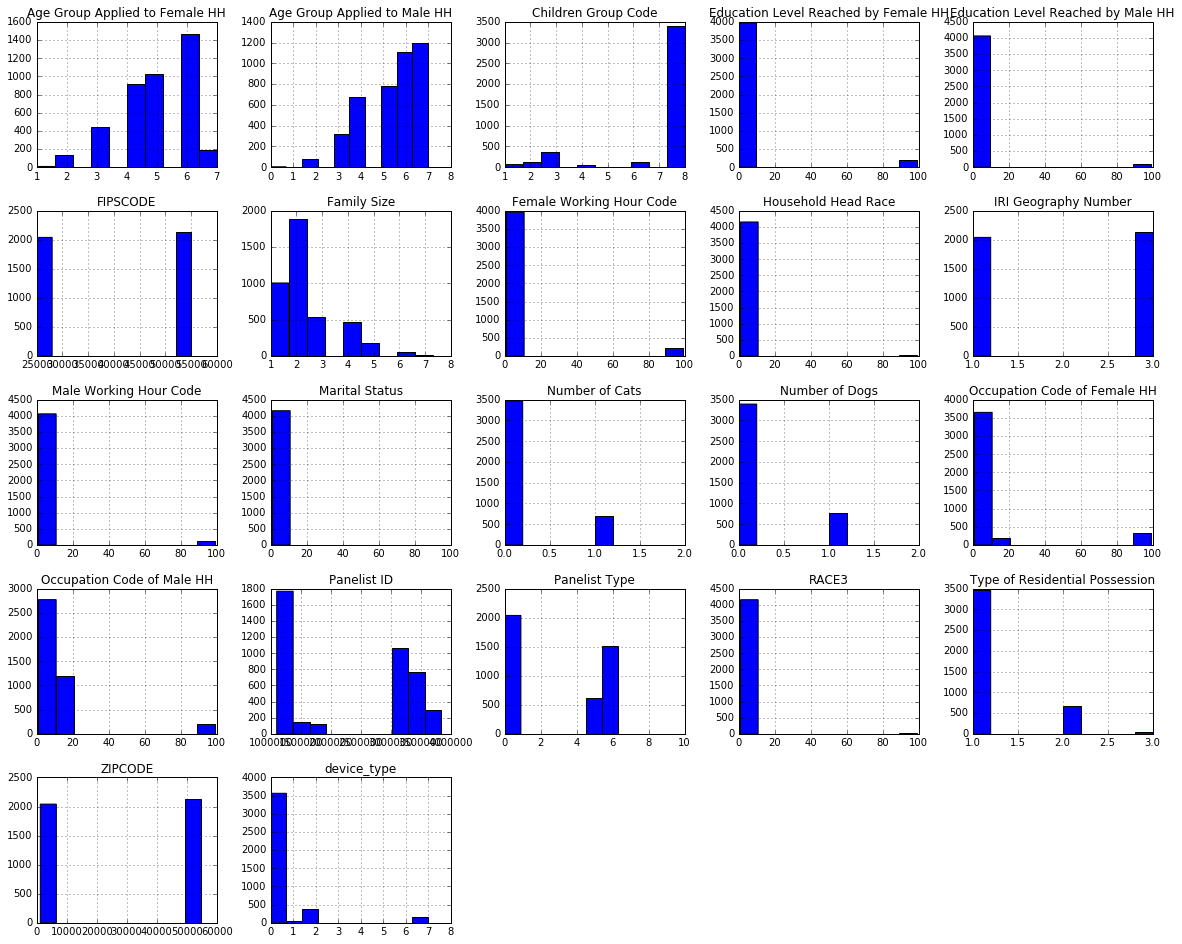

In [5]:
## Plot histogram of all the features to understand the spread

combined_demo2.hist(figsize=(20,50), layout=(15,5))
plt.show()

In [6]:
## Describe the data

combined_demo2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Panelist ID,4171,2303335.146488,1053446.178836,1100016,1201131.5,3103820,3303036.5,3843110
Panelist Type,4171,2.922321,2.875549,0,0.0,5,6.0,9
Family Size,4171,2.326540,1.212965,1,2.0,2,3.0,8
Household Head Race,4171,1.494845,6.433289,1,1.0,1,1.0,99
Type of Residential Possession,4171,1.181491,0.409600,1,1.0,1,1.0,3
Age Group Applied to Male HH,4171,5.468713,1.361395,0,4.0,6,7.0,7
Education Level Reached by Male HH,4171,5.475426,15.343096,0,0.0,3,5.0,99
Occupation Code of Male HH,4171,11.648765,19.762671,1,5.0,9,11.0,99
Male Working Hour Code,4171,5.234956,15.466400,1,2.0,3,4.0,99
Age Group Applied to Female HH,4171,4.906018,1.220249,1,4.0,5,6.0,7


In [7]:
## Data cleaning

for_clustering3 = combined_demo2.fillna(0) ## Treat NaN
for_clustering3.replace('99',0,inplace=True) ## Treat the extreme value 99 
for_clustering3.replace('98',0,inplace=True) ## Treat the extreme value 98
for_clustering3 = for_clustering3.convert_objects(convert_numeric=True) ## Convert all the columns to numeric values
for_clustering3 = for_clustering3.fillna(0) ## Replace NaNs
for_clustering3['Male Working Hour Code'].replace(7,0,inplace=True) ## Convert the extreme value 7 to 0 to keep NAs consistent
for_clustering3['Female Working Hour Code'].replace(7,0,inplace=True) ## Convert the extreme value 7 to 0 to keep NAs consistent
for_clustering3['Age Group Applied to Male HH'].replace(7,0,inplace=True) ## Convert the extreme value 7 to 0 to keep NAs consistent
for_clustering3['Age Group Applied to Female HH'].replace(7,0,inplace=True) ## Convert the extreme value 7 to 0 to keep NAs consistent

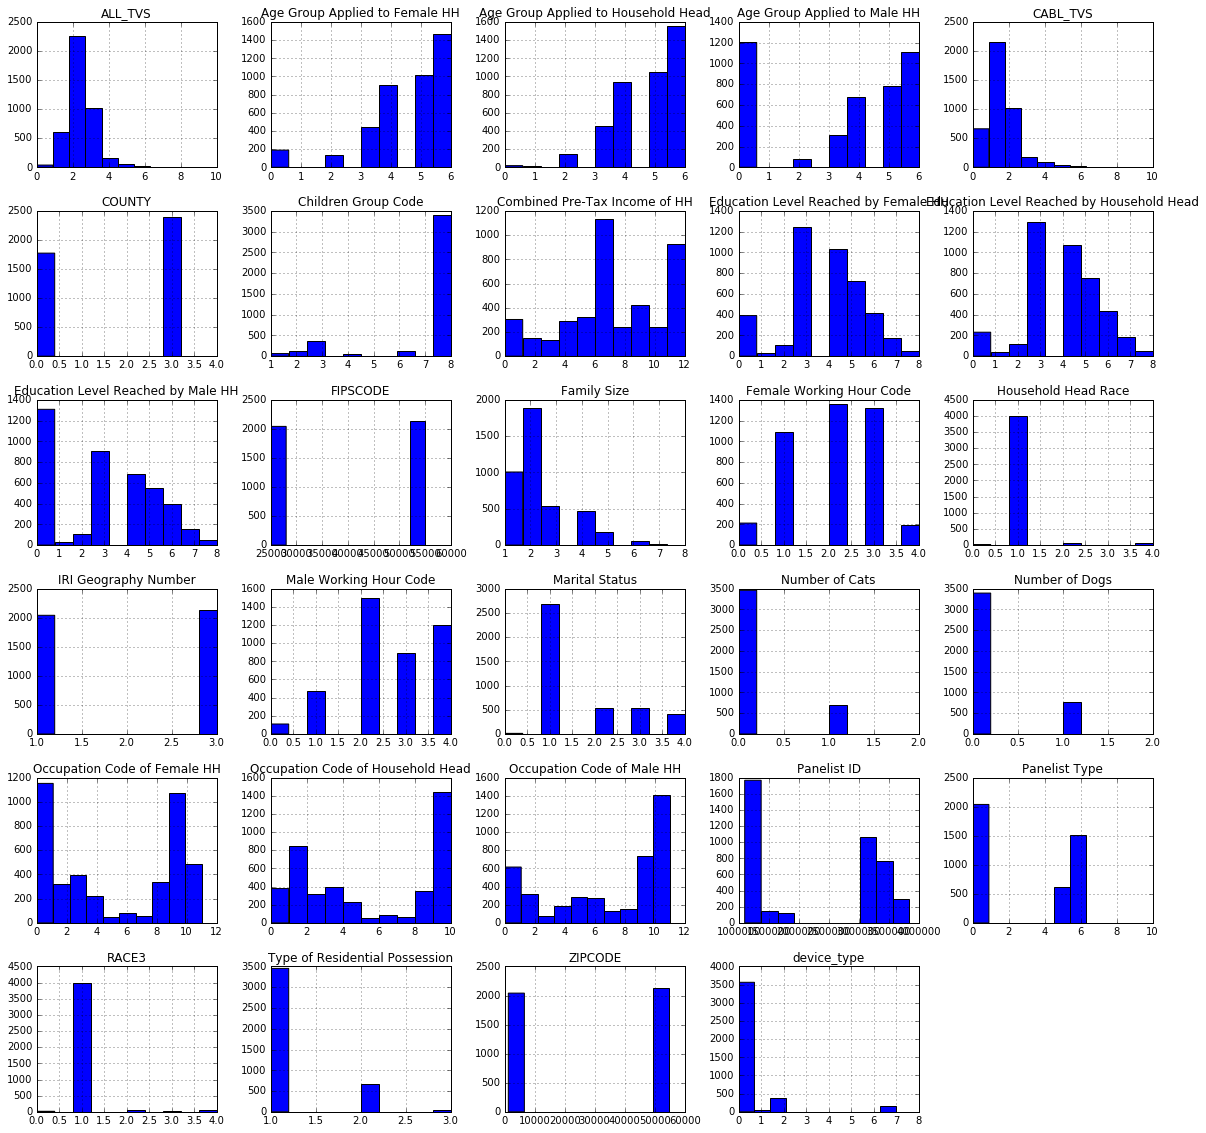

In [8]:
## Plot the histograms of cleaned data

for_clustering5 = for_clustering3.copy()
for_clustering5.hist(figsize=(20,50), layout=(15,5))
plt.show()

In [9]:
## Keep only useful columns

## Removing these columns as they do not have much information based on the histograms above.
drop_cols = ['ALL_TVS','CABL_TVS','COUNTY',
             'Children Group Code',
             'Household Head Race','IRI Geography Number',
             'Occupation Code of Household Head',
             'Education Level Reached by Household Head',
             'Age Group Applied to Household Head',
             'RACE3','ZIPCODE','device_type','Panelist ID','Marital Status',
             'Panelist Type', 'Female Working Hour Code','Male Working Hour Code',
#              'Occupation Code of Female HH','Occupation Code of Male HH',
             'FIPSCODE','Type of Residential Possession','Number of Cats',
             'Number of Dogs'
            ]

for_clustering6 = for_clustering5.drop(drop_cols,axis=1)

### Understand the distribution of the selected variables
Here I wanted to capture the details related to family size, age group, gender and occupation as important features to cluster the variables.

While selecting the variables, I have also ensured that they have good distribution to help clustering.

#### Selected variables:
1.Age Group Applied to Female HH<br />
2.Age Group Applied to Male HH<br />
3.Combined Pre-Tax Income of HH<br />
4.Education Level Reached by Female HH<br />
5.Education Level Reached by Male HH<br />
6.Family Size<br />
7.Occupation Code of Female HH<br />
8.Occupation Code of Male HH<br />

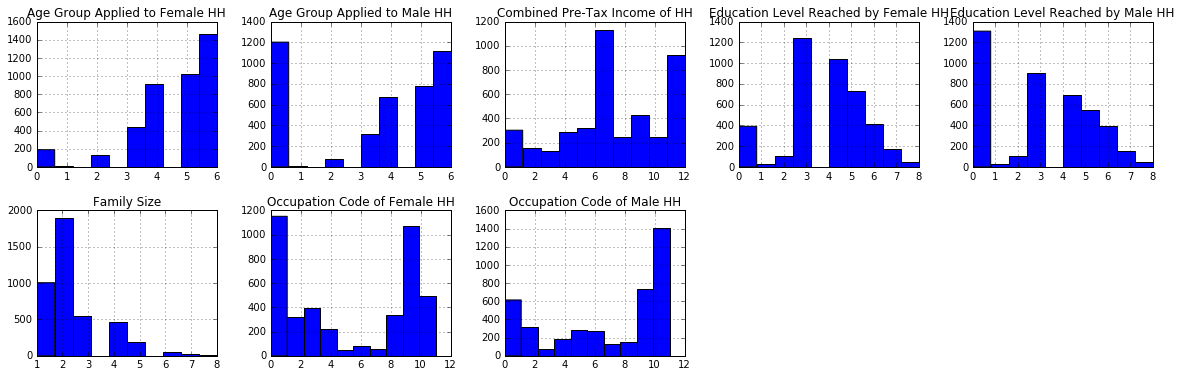

In [10]:
for_clustering6.hist(figsize=(20,50), layout=(15,5))
plt.show()

### Clustering method 1: K-means

First plot an elbow curve to determine the number of clusters.

[239745.0, 162870.0, 122060.0, 105102.0, 91696.0, 81145.0, 73741.0, 68820.0, 63713.0, 59982.0, 57295.0, 54167.0, 51650.0, 49449.0, 47562.0, 45593.0, 43793.0, 42995.0, 41845.0, 40440.0, 39777.0, 38388.0, 37681.0, 36951.0, 36249.0, 35528.0, 34852.0, 34268.0, 33879.0, 33286.0, 32658.0, 32284.0, 31459.0, 31270.0, 30999.0, 30227.0, 30048.0, 29710.0, 29217.0, 28705.0, 28301.0, 27799.0, 27988.0, 27368.0, 26951.0, 26755.0, 26685.0, 26298.0, 26121.0]


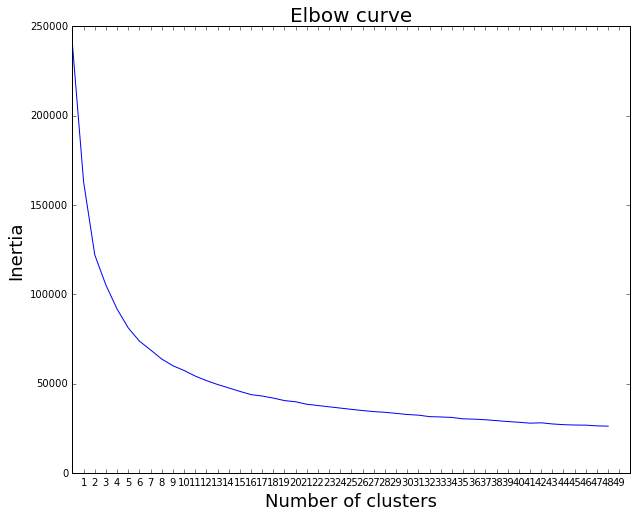

In [11]:
## Plot the Elbow curve

from sklearn.cluster import KMeans

for_clustering6 = for_clustering6.fillna(-1)
inertia = []

K = range(1,50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kn2d = kmeans.fit(for_clustering6)
    inertia.append(round(kn2d.inertia_))
print inertia


import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(inertia)
plt.xticks(range(1,50))
plt.xlabel('Number of clusters',fontsize = 18)
plt.ylabel('Inertia',fontsize = 18)
plt.title('Elbow curve',fontsize = 20)
plt.show()

In [12]:
## Based on the elbow curve, I chose to select 6 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=4)
kn2d = kmeans.fit(for_clustering6)
labels_normal = kn2d.predict(for_clustering6)

labels_normal = pd.DataFrame(labels_normal)

In [13]:
# Get the centroids and rank the features to plot

centers = pd.DataFrame(kn2d.cluster_centers_)
centers_rank = centers.rank(axis=0, ascending=True)

centers.columns = for_clustering6.columns
centers_rank.columns = for_clustering6.columns

In [14]:
# Get Silhoutte score to compare the two clustering methods.

from sklearn import metrics
labels = kmeans.labels_
metrics.silhouette_score(for_clustering6, labels, metric='euclidean')

0.30790119477130801

### Note:

In the following section, I have plotted the cluster profiles. In these graphs, the size of the bar indicates the rank of the variable. The numbers on the bar indicate the value of the variable chosen to help in interpretation.

The clusters can be interpreted as follows:

1. Cluster 1: Older (55+ yrs) empty nesters, private household workers with a lower income (25k to 35k)

2. Cluster 2: Older Female HH (55 - 64 yrs), private household workers with a high school education

3. Cluster 3: Middle class (income 45-54k) with small families of 3 people with middle aged Male HH (45-54 yrs) who are high school graduates

4. Cluster 4: Upper middle class (income 55-65k) with small families of 3 people with a managerial/admisnistrative or professional/technical occupation

5. Cluster 5: Older Female HH (55 - 64 yrs), managerial/adminstrative occupation with a small family and lower income (25 to 35k)

6. Cluster 6: This is a mixed bag of panelists. Very hard to interpret.

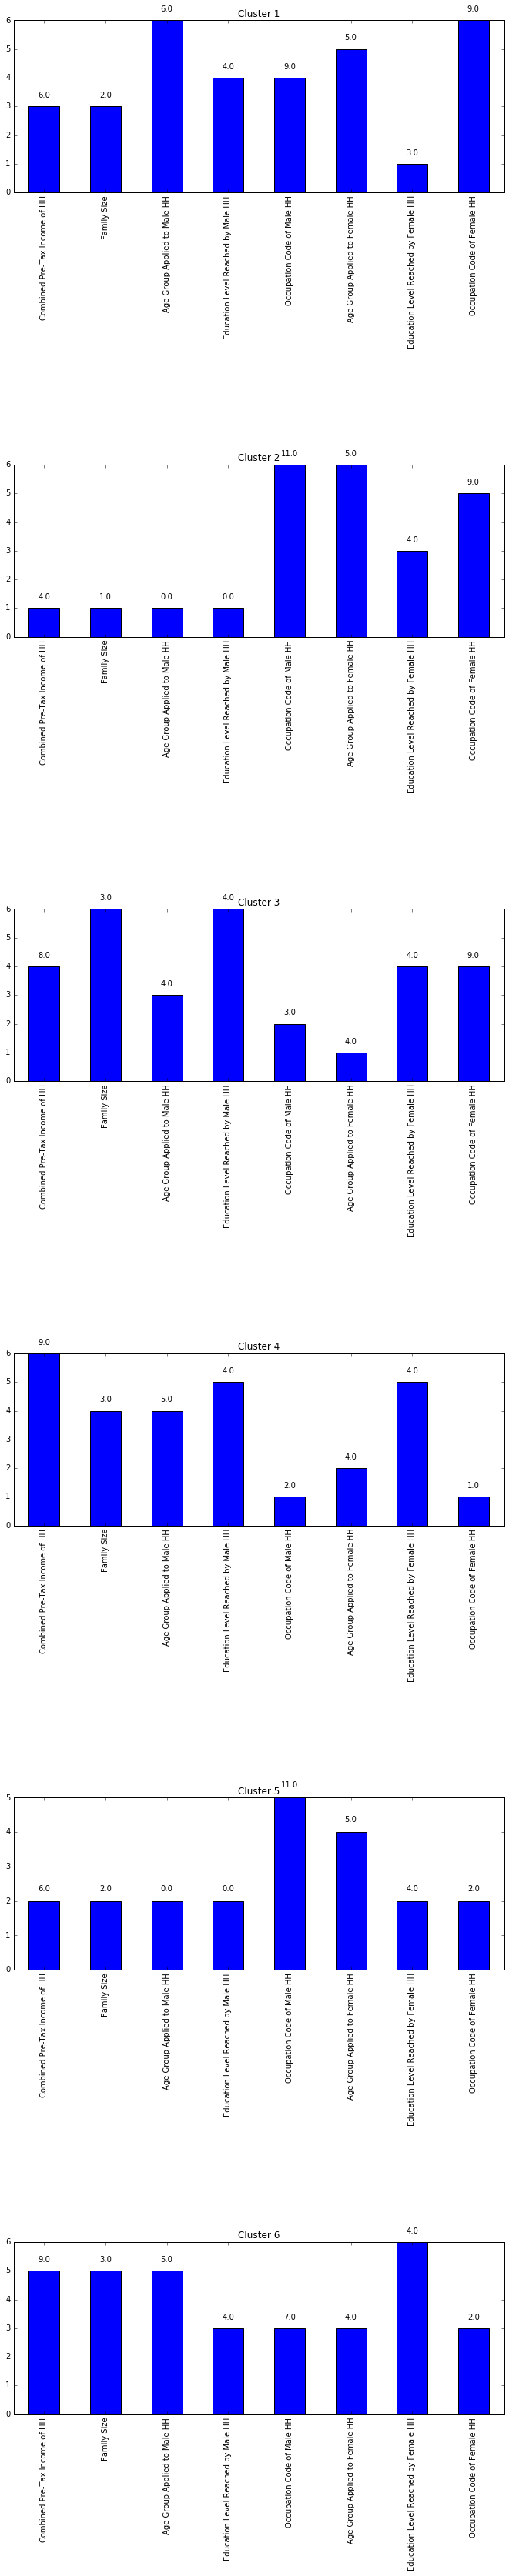

In [15]:
## Note:
# Plot profiles of each of the cluster
# The size of the bar indicates the rank of the variable
# The numbers on the bar indicate the value of the variable chosen to help in interpretation

import matplotlib.patches as patches
f, a = plt.subplots(6,1)
f.tight_layout()
left, width = .25, .5
bottom, height = .25, .5
title_list = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6']
for i in range(6):
    df = pd.DataFrame(zip(centers_rank.ix[i],centers.ix[i]))
    df.columns = ['rank','val']
    df['rank'].plot(kind='bar',ax=a[i],figsize=(10,50))
    a[i].set_xticklabels((centers_rank.columns),rotation=90)
    a[i].set_title(title_list[i])
    rects = a[i].patches
    labels = list((df['val'].apply(lambda x:round(x))))
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        a[i].text(rect.get_x() + rect.get_width()/2, height + 0.25, label, ha='center', va='bottom')

### Clustering Method 2 - Birch

Similar to K-means clustering, I have used Birch clustering and obtained 6 clusters. 

In [16]:
from sklearn.cluster import Birch
X = for_clustering6
brc = Birch( n_clusters=4,compute_labels=True)
brc.fit(X)
labels_normal = brc.predict(X)
labels_normal = pd.DataFrame(labels_normal)

In [17]:
centers = pd.DataFrame(brc.subcluster_centers_)

centers_rank = centers.rank(axis=0, ascending=True)

centers.columns = for_clustering6.columns
centers_rank.columns = for_clustering6.columns

In [18]:
# Get Silhoutte score to compare the two clustering methods.

from sklearn import metrics
labels = brc.labels_
metrics.silhouette_score(for_clustering6, labels, metric='euclidean')

0.24485633402479726

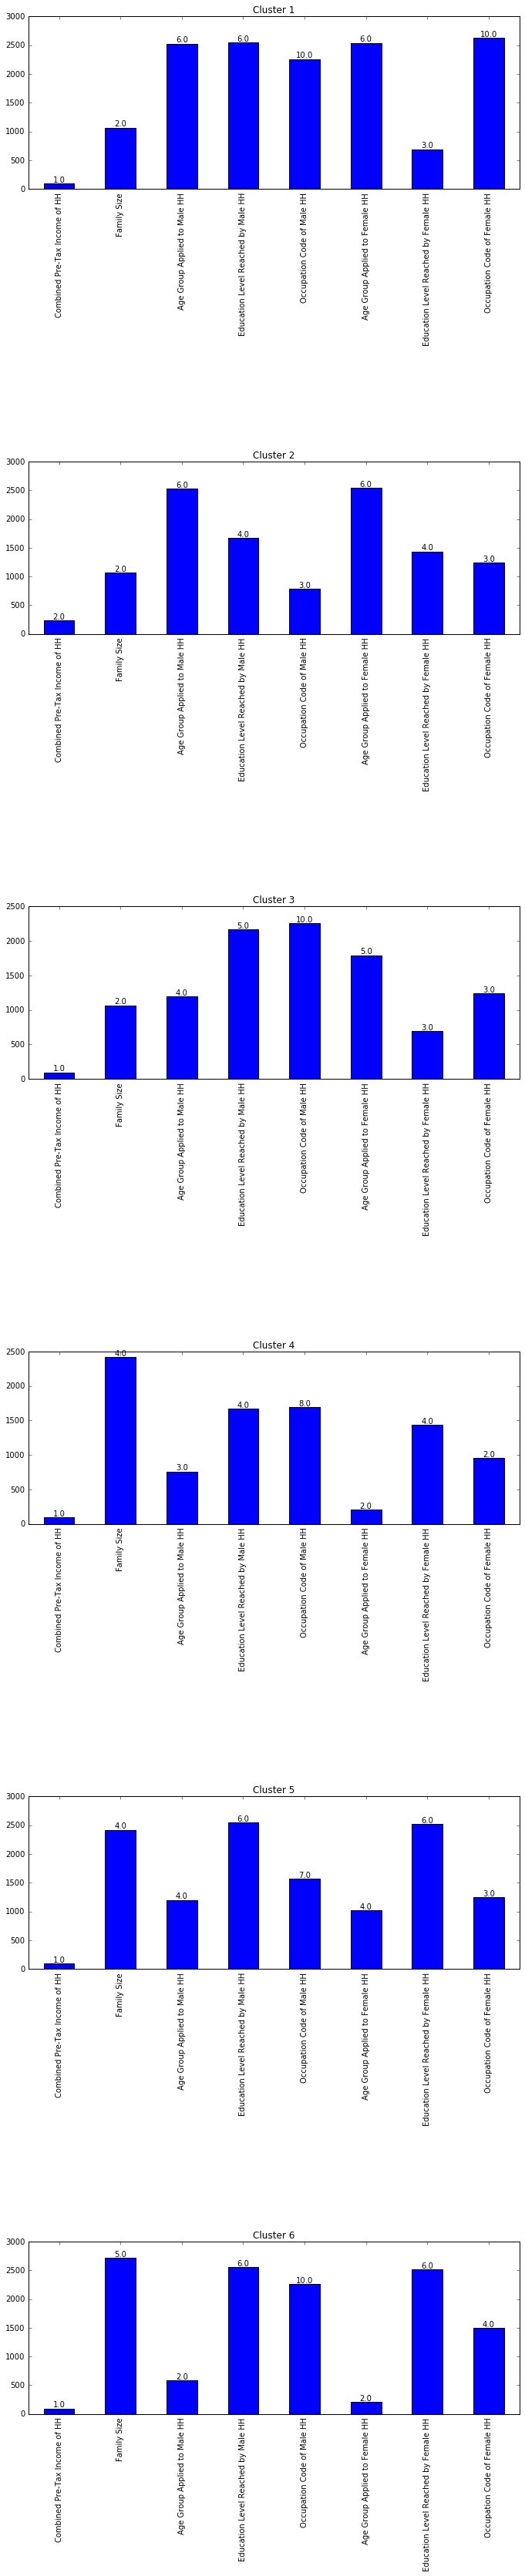

In [19]:
## Note:
# Plot profiles of each of the cluster
# The size of the bar indicates the rank of the variable
# The numbers on the bar indicate the value of the variable chosen to help in interpretation

import matplotlib.patches as patches
f, a = plt.subplots(6,1)
f.tight_layout()
left, width = .25, .5
bottom, height = .25, .5
title_list = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6']
for i in range(6):
    df = pd.DataFrame(zip(centers_rank.ix[i],centers.ix[i]))
    df.columns = ['rank','val']
    df['rank'].plot(kind='bar',ax=a[i],figsize=(10,50))
    a[i].set_xticklabels((centers_rank.columns),rotation=90)
    a[i].set_title(title_list[i])
    rects = a[i].patches
    labels = list((df['val'].apply(lambda x:round(x))))
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        a[i].text(rect.get_x() + rect.get_width()/2, height + 0.25, label, ha='center', va='bottom')

#### Conclusion:
By looking at the silhoutte score for the two methods, K-means seems to be a better option